<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/classification-NN-modeling/02_neural_network_classification_with_tensorflow_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the continuation of the part 2 neural network classification-

* This part will cover the `multiclass classification` task.
* Here we will work with TensorFlow Mnist Fashion Dataset.
* Which has 10 classes and 70000 images of 28x28 pixels.

## Importing dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# showing the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

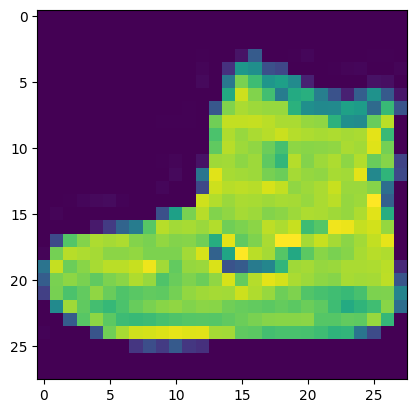

In [5]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [6]:
# check out the samples label
train_labels[7]

2

In [7]:
# creating a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

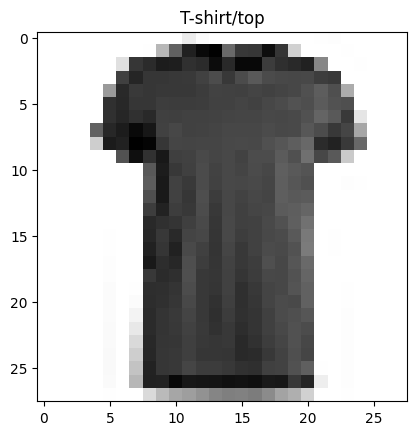

In [8]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

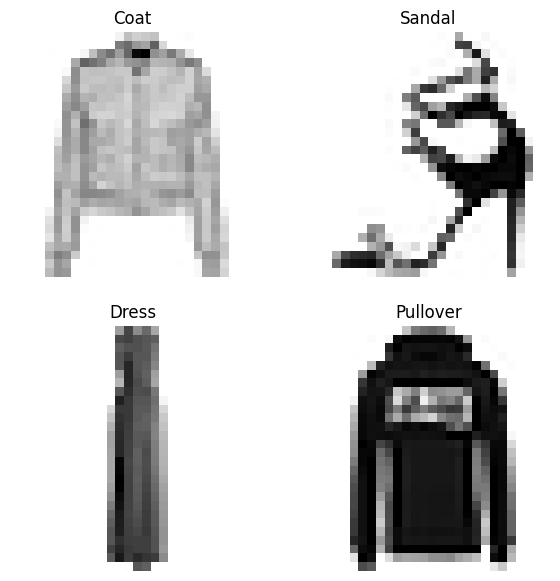

In [9]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building model and exploring

For our multiclass classification model, we can use a similar architrecture to our binary classifications, however, we're going to have to tweak a few things:

* Input shape = 28 x 28 (The shape of one image)
* Output shape = 10 (One per class of clouthing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

### flatten layer in action

In [10]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])

flatten_model.output_shape

(None, 784)

In [11]:
28 * 28

784

### Multiclass classification model

🧮NOTE: `CategoricalCrossentropy()` does not allow integer representation of labels. It only allows `OneHot-encoded` representaiton of labels. But there is another loss function available which allows integer representation of labels which is `SparseCategoricalCrossentropy()`

In [12]:
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_1.compile(loss=tf.losses.CategoricalCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_1_history = model_1.fit(train_data,
                              tf.one_hot(train_labels, depth=10),
                              epochs=10,
                              validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 2.4561 - accuracy: 0.0973 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


📖The model is performing badly on the training and testing data.

In order to improve the training and testing accuracy we have to look into the training data.

In [14]:
# chcek the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

**Conclusion:**

Neural network prefers data to be scaled or normalized so that it can able to find patterns in the data.

By scalling and normalizing it means that the values of the tensors will be within the range of 0 - 1.

In [15]:
# normalizing our training and testing data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Training our model on normalized training data

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.losses.CategoricalCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=['accuracy'])

model_2_history = model_2.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=10,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3430 - accuracy: 0.5014 - val_loss: 0.9321 - val_accuracy: 0.6438
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7777 - accuracy: 0.7279 - val_loss: 0.7292 - val_accuracy: 0.7601
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6527 - accuracy: 0.7691 - val_loss: 0.6618 - val_accuracy: 0.7641
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6078 - accuracy: 0.7804 - val_loss: 0.6273 - val_accuracy: 0.7740
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5874 - accuracy: 0.7879 - val_loss: 0.6263 - val_accuracy: 0.7798
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5691 - accuracy: 0.7985 - val_loss: 0.6407 - val_accuracy: 0.7792
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5564 - accuracy: 0.8077 - val_loss: 0.5982 - val_accuracy:

### Comparison between the normalized and non-normalized data

<Axes: title={'center': 'Normalized Data'}>

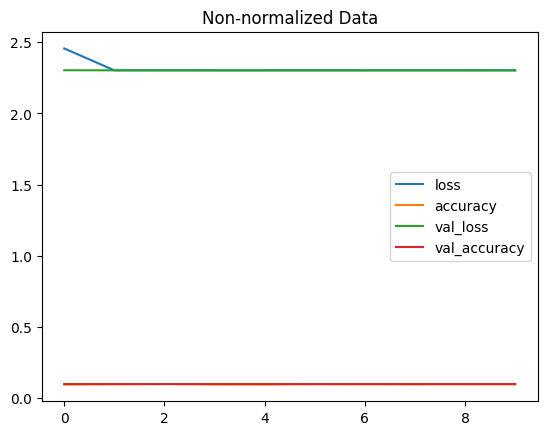

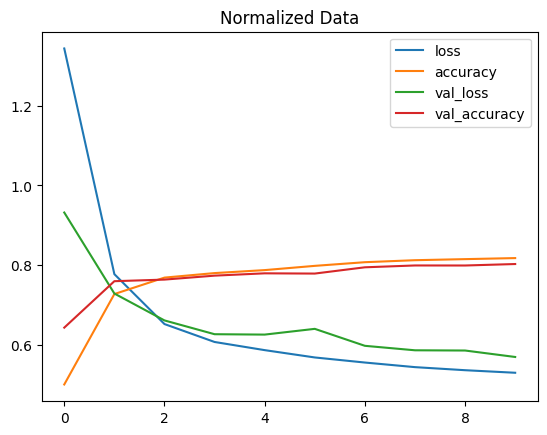

In [17]:
import pandas as pd

# plot non-normalized data loss curves
pd.DataFrame(model_1_history.history).plot(title='Non-normalized Data')

# plot normalized data loss curves
pd.DataFrame(model_2_history.history).plot(title='Normalized Data')

> 🔑 **Note:** The same model with even slightly different data can produce dramatically different resuts. So when we are comparing models, it's important to make sure we are comparing then on the same criteria (e.g. same architecture but different data or same data but different architecture).

### Finding the ideal learning rate

In [18]:
tf.random.set_seed(42)

# creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_3.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=['accuracy'])

# creating learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

# fit the model
model_3_history = model_3.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3102 - accuracy: 0.5058 - val_loss: 113.8454 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8424 - accuracy: 0.7143 - val_loss: 128.2109 - val_accuracy: 0.5959 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6659 - accuracy: 0.7778 - val_loss: 132.5056 - val_accuracy: 0.6343 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6082 - accuracy: 0.7926 - val_loss: 137.3408 - val_accuracy: 0.6440 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5892 - accuracy: 0.7988 - val_loss: 162.6527 - val_accuracy: 0.5716 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5756 - accuracy: 0.8025 - val_loss: 156.7626 - val_accuracy: 0.5746 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

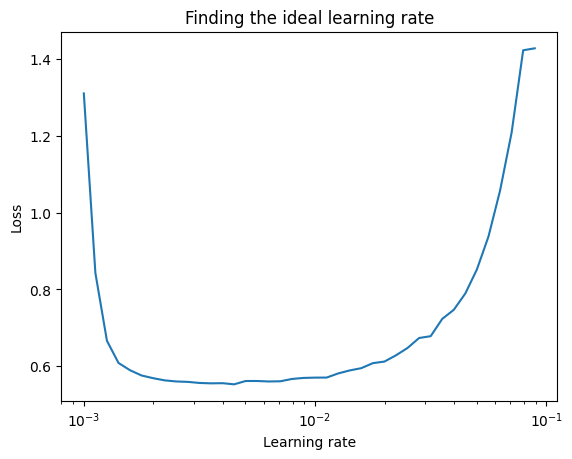

In [19]:
# plot the learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40) / 20))
plt.semilogx(lrs, model_3_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [20]:
# training the model with ideal learning rate
tf.random.set_seed(42)

# creating the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_4.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# fit the model
model_4_history = model_4.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4414 - accuracy: 0.4295 - val_loss: 164.3354 - val_accuracy: 0.3899
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8630 - accuracy: 0.6880 - val_loss: 176.1460 - val_accuracy: 0.4679
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6658 - accuracy: 0.7670 - val_loss: 163.7450 - val_accuracy: 0.4792
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6280 - accuracy: 0.7814 - val_loss: 169.1382 - val_accuracy: 0.4847
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6072 - accuracy: 0.7895 - val_loss: 171.1947 - val_accuracy: 0.5160
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7927 - val_loss: 139.0918 - val_accuracy: 0.4985
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5856 - accuracy: 0.7961 - val_loss: 128.8526 -

<Axes: title={'center': 'Training Curve'}>

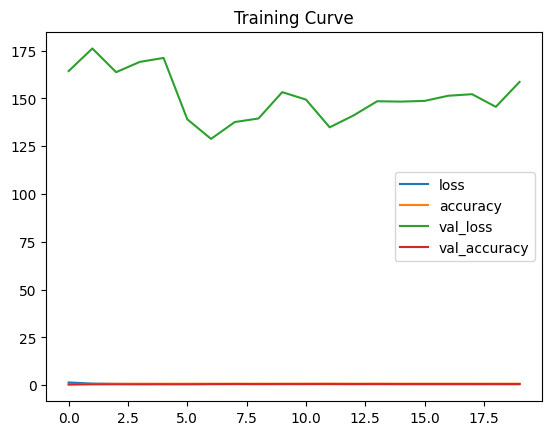

In [21]:
# plot normalized data loss curves
pd.DataFrame(model_4_history.history).plot(title='Training Curve')

### Evaluateing the model

In [22]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_metrics(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # create the confusion metrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   # normalize our confusion matrix
  n_classes = cm.shape[0]

  # let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set threshhold for different colors
  threshold = (cm.max() + cm.min()) / 2.0

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)

In [23]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
# make some predictions with our model
y_probs = model_4.predict(test_data_norm)

# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.9235705e-09, 6.3376726e-10, 1.8103815e-11, 2.0953479e-09,
        9.5032231e-09, 4.6217334e-01, 2.6382869e-08, 2.9605296e-01,
        2.0479246e-04, 2.4156882e-01],
       [1.5584614e-04, 6.1323352e-10, 9.4241488e-01, 2.8839468e-05,
        1.6745623e-02, 5.2961271e-27, 4.0654857e-02, 0.0000000e+00,
        6.5015477e-09, 0.0000000e+00],
       [1.3109183e-11, 9.9990904e-01, 1.2217193e-07, 1.2066547e-05,
        7.8723257e-05, 9.9006014e-15, 1.5351782e-08, 1.3033739e-11,
        9.2366403e-10, 2.7662037e-22],
       [1.0958091e-09, 9.9951768e-01, 1.7996583e-06, 1.6414527e-04,
        3.1602735e-04, 7.5049244e-13, 3.1157330e-07, 2.1128950e-10,
        1.3588912e-08, 1.5006854e-19],
       [3.1747395e-01, 5.2281971e-06, 1.9125980e-01, 5.3419121e-02,
        2.0435814e-02, 3.1902212e-09, 4.1652966e-01, 3.8923278e-17,
        8.7637024e-04, 7.0330268e-25]], dtype=float32)

> **🔑Note:** We have to make predictions with the same kind of data that we have used to train our model (e.g. if we have trained our model on normalized data, we should use that same kind of normalized data to predict the output)

In [26]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.9235705e-09, 6.3376726e-10, 1.8103815e-11, 2.0953479e-09,
        9.5032231e-09, 4.6217334e-01, 2.6382869e-08, 2.9605296e-01,
        2.0479246e-04, 2.4156882e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [27]:
# convert all the predictioni probabilities into integers
y_preds = y_probs.argmax(axis=1)

# view the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [28]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[750,   1,  14, 123,   3,   4,  99,   0,   6,   0],
       [  1, 932,   3,  51,  11,   0,   1,   0,   1,   0],
       [ 19,   1, 602,  39, 215,   0, 121,   0,   3,   0],
       [ 35,  14,  18, 863,  34,   4,  28,   0,   4,   0],
       [  1,   8,  83,  45, 784,   0,  73,   0,   6,   0],
       [  0,   1,   0,   3,   0, 878,   0,  61,  19,  38],
       [191,   4, 101,  94, 155,   0, 442,   0,  13,   0],
       [  0,   0,   0,   0,   0,  39,   0, 944,   0,  17],
       [  9,   2,   3,   7,  14,  16,  56,   5, 888,   0],
       [  0,   0,   0,   0,   0,  33,   0,  79,   1, 887]])

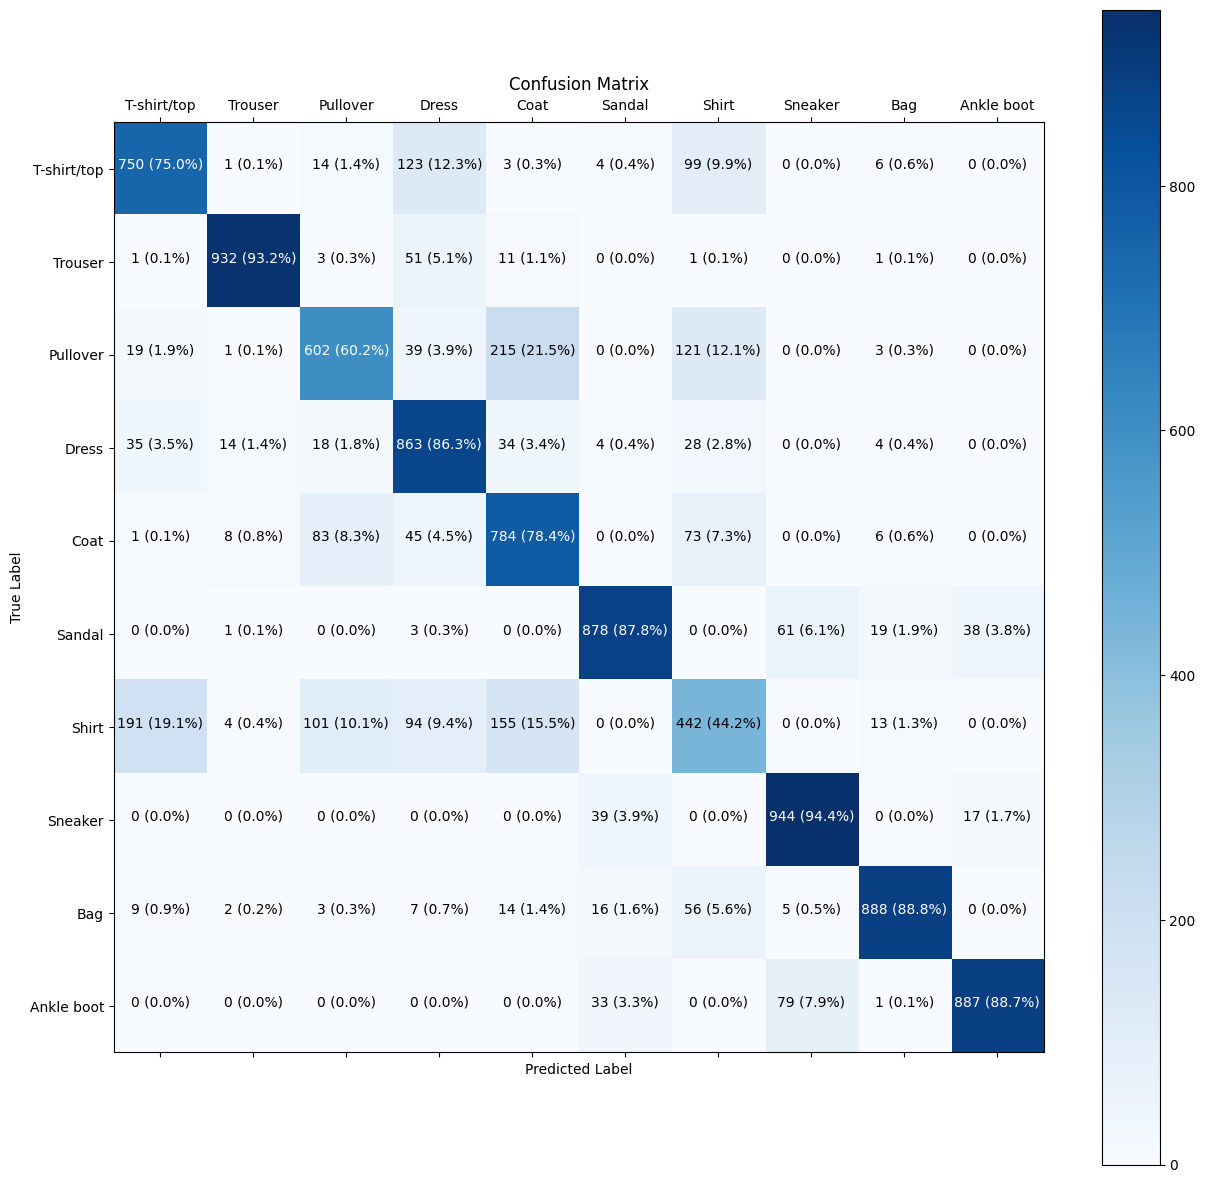

In [29]:
# make a prettier confusion matrix
make_confusion_metrics(y_true=test_labels,
                       y_pred=y_preds,
                       classes=class_names,
                       figsize=(15, 15),
                       text_size=10)

### How about creating a fun little function for:

* Plot a random mage.
* Make a prediction on said image.
* Label the plot with the truth label and the predicted label.

In [30]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth labels.
  '''

  # set up random number
  i = random.randint(0, len(images))

  # cretae predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of the titels depending on the prediction is rigth or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # add xlabel information (prediction/true label)
  plt.xlabel('pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)  # set the color to green or red based on if the prediction is right or wrong

1/1 [==============================] - 0s 31ms/step


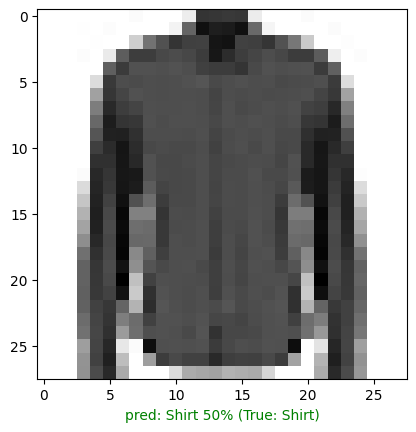

In [35]:
# check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_norm,   # always make predictions on the same kind of data that the model is trained on
                  true_labels=test_labels,
                  classes=class_names)

### Accessing the layers weights and biases

In [36]:
model_4.layers

In [39]:
model_4.layers[1]

In [41]:
# getting the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[-6.0062766e-02,  7.4997544e-04, -3.5587093e-01,  1.2470543e-01],
        [-2.7165484e-01, -1.4270879e-02, -9.7493029e-01,  5.4911709e-01],
        [-1.0955789e+00, -6.6453747e-02, -1.2866808e-01,  3.7045774e-01],
        ...,
        [-3.6042896e-01, -5.2034281e-02,  8.9405559e-02,  4.4071302e-03],
        [ 2.6890391e-01, -1.0007814e-02, -4.9384731e-01,  1.6480994e-01],
        [-3.8683027e-01, -1.5252240e-02, -2.2803862e-02, -1.2014356e-01]],
       dtype=float32),
 (784, 4))

In [42]:
28 * 28

784

In [43]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


> Every neuron has a bias vector. Each of these is paired with a weights matrix.

> The bias vecotr get initialized as zeros (at least in the case of a TensorFlow Dense Layer).

> The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [45]:
# check out the bias vector
biases, biases.shape

(array([ 1.5344465 , -0.03963041,  1.4377484 ,  1.0363157 ], dtype=float32),
 (4,))

In [44]:
# second layer (first dense layer) weights has vector shape of 784
# second layer has 4 neurons each hase weight vector of shape 784
# 4 neurons has 4 bias vecotr of shape 1
print('Total number of parameters of second layer (first dense layer): ', 784*4 + 4)

Total number of parameters of second layer (first dense layer):  3140


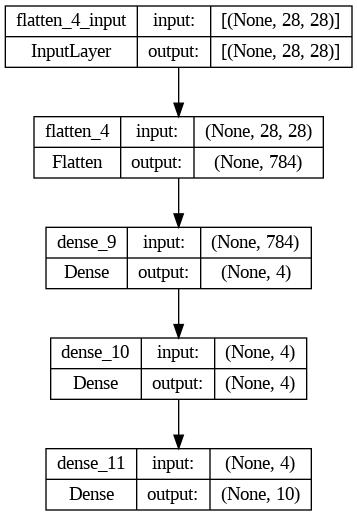

In [48]:
# plot the model
tf.keras.utils.plot_model(model_4, show_shapes=True)